In [208]:
library(tidyverse)
library(magrittr)
library(purrr) 
library(glue) 
library(stringr) 

library(rvest) 
library(polite)
library(xml2) 

In [209]:
all_region_fire_incident <- read_html('https://www.fireandemergency.nz/incidents-and-news/incident-reports/')

In [210]:
north_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(6) .region .region__link') %>%
   html_attr('href') 
north_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=1&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=1&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=1&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=1&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=1&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday"

In [211]:
central_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(7) .region .region__link') %>%
   html_attr('href') 
central_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=2&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=2&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=2&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=2&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=2&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday"

In [212]:
south_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(8) .region .region__link') %>%
   html_attr('href') 
south_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=3&day=Monday"   
[2] "/incidents-and-news/incident-reports/incidents?region=3&day=Sunday"   
[3] "/incidents-and-news/incident-reports/incidents?region=3&day=Saturday" 
[4] "/incidents-and-news/incident-reports/incidents?region=3&day=Friday"   
[5] "/incidents-and-news/incident-reports/incidents?region=3&day=Thursday" 
[6] "/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday"
[7] "/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday"

In [213]:
all_region_href <- tibble(North = north_region_href, Central = central_region_href, South = south_region_href)
all_region_href

North,Central,South
<chr>,<chr>,<chr>
/incidents-and-news/incident-reports/incidents?region=1&day=Monday,/incidents-and-news/incident-reports/incidents?region=2&day=Monday,/incidents-and-news/incident-reports/incidents?region=3&day=Monday
/incidents-and-news/incident-reports/incidents?region=1&day=Sunday,/incidents-and-news/incident-reports/incidents?region=2&day=Sunday,/incidents-and-news/incident-reports/incidents?region=3&day=Sunday
/incidents-and-news/incident-reports/incidents?region=1&day=Saturday,/incidents-and-news/incident-reports/incidents?region=2&day=Saturday,/incidents-and-news/incident-reports/incidents?region=3&day=Saturday
/incidents-and-news/incident-reports/incidents?region=1&day=Friday,/incidents-and-news/incident-reports/incidents?region=2&day=Friday,/incidents-and-news/incident-reports/incidents?region=3&day=Friday
/incidents-and-news/incident-reports/incidents?region=1&day=Thursday,/incidents-and-news/incident-reports/incidents?region=2&day=Thursday,/incidents-and-news/incident-reports/incidents?region=3&day=Thursday
/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday
/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday


In [214]:
install.packages('xts')
library(xts)


  There is a binary version available but the source version is later:
    binary source needs_compilation
xts 0.12.1 0.12.2              TRUE



installing the source package ‘xts’




In [11]:
region_incident_data <- function(href){
    
    region_data <- glue('https://www.fireandemergency.nz{href}#')%>%
                   read_html() %>%
                   html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                   html_text2()

    region_round_time <- strptime(region_data, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(region_round_time)){
        region_round_time[i] <- align.time(region_round_time[i], n=60*30
        )

    }
    
    return(region_round_time)
    
    }
    result <- region_incident_data("/incidents-and-news/incident-reports/incidents?region=1&day=Monday#")
    result
                  

 [1] "2022-10-10 01:00:00 NZDT" "2022-10-10 05:00:00 NZDT"
 [3] "2022-10-10 07:00:00 NZDT" "2022-10-10 07:30:00 NZDT"
 [5] "2022-10-10 07:30:00 NZDT" "2022-10-10 07:30:00 NZDT"
 [7] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:00:00 NZDT"
 [9] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:00:00 NZDT"
[11] "2022-10-10 08:30:00 NZDT" "2022-10-10 08:30:00 NZDT"
[13] "2022-10-10 08:30:00 NZDT" "2022-10-10 09:00:00 NZDT"
[15] "2022-10-10 09:00:00 NZDT" "2022-10-10 09:30:00 NZDT"
[17] "2022-10-10 09:30:00 NZDT" "2022-10-10 09:30:00 NZDT"
[19] "2022-10-10 09:30:00 NZDT" "2022-10-10 10:00:00 NZDT"
[21] "2022-10-10 10:00:00 NZDT" "2022-10-10 10:00:00 NZDT"
[23] "2022-10-10 10:30:00 NZDT" "2022-10-10 10:30:00 NZDT"
[25] "2022-10-10 10:30:00 NZDT" "2022-10-10 10:30:00 NZDT"
[27] "2022-10-10 11:00:00 NZDT" "2022-10-10 11:00:00 NZDT"
[29] "2022-10-10 11:00:00 NZDT" "2022-10-10 11:30:00 NZDT"
[31] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZDT"
[33] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZD

In [12]:
# this function return a data frame/tibble which contains all the data scraped from the fire incidents reports data
# this function takes id( characters indicating the region id; 1 being North, 2 being Central and 3 being South) and the day(string indicating the day of interest; e.g. Monday, Tuesday, etc)
region_incident_data <- function(id, day){
    
    region_href <- glue('https://www.fireandemergency.nz/incidents-and-news/incident-reports/incidents?region={id}&day={day}#')%>%
                   read_html() # first here we prepare the url which is the url for the page we want to scrape, then use read_html() function we scrape the data from the webpage and store the data in a variable
    # then from the scraped data which is the result from above code, we tried to categories the data we get and put the data in each category to their own varibale(performed below).


    Incident <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(1) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()# so here we tried to get the data which tell us about incident number from the scrapped data and store it to variable
    
    Date_and_Time <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about date and time from the scrapped data and store it to variable

    Date_and_Time <- strptime(Date_and_Time, "%d/%m/%Y %H:%M:%S") #Date and time requires special treatment in our case, since we would like to runf the time to the nearest 30 minute, we have to change the data type from char to dttm(date and time). strptime() function allows us to do that

    # then here we tried to format it to nearest 30 minutes, we do it by looping through the date and time column
    for(i in 1:length(Date_and_Time)){
        Date_and_Time[i] <- align.time(Date_and_Time[i], n=60*30 # then by using align.time() function we make the time to nearest 30 minutes
        )

    }
    

    Location <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(3) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about location from the scrapped data and store it to variable
    
    Duration <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(4) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about duration from the scrapped data and store it to variable
    
    Station <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(5) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about fire station from the scrapped data and store it to variable
    
    Result <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(6) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about result(which has result description and result code) from the scrapped data and store it to variable
    
    # then using the 
    region_incident_table <- tibble(Incident_no = Incident, Date_and_Time = Date_and_Time, Location = Location, Duration = Duration, Station = Station, Result = Result)
    
    return(region_incident_table)
    
    }

format:
{region}_{day}_data

### North fire incident data (Monday to Sunday)

In [216]:
north_monday_data <- region_incident_data("1", "Monday")
north_monday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3579643,2022-10-17 00:30:00,WESTGATE AUCKLAND,00:00:00,West Harbour,
F3579644,2022-10-17 01:00:00,WARKWORTH AUCKLAND,00:00:00,Warkworth,
F3579645,2022-10-17 01:30:00,ROYAL OAK AUCKLAND,00:00:00,Onehunga,
F3579646,2022-10-17 01:30:00,WHANGAREI HEADS WHANGAREI DISTRICT,00:00:00,Whangarei Heads,
F3579647,2022-10-17 01:30:00,PAKURANGA HEIGHTS AUCKLAND,00:00:00,Howick,
F3579653,2022-10-17 03:00:00,TORBAY AUCKLAND,00:00:00,East Coast Bays,
F3579660,2022-10-17 04:00:00,ROSEDALE AUCKLAND,00:00:00,Albany,
F3579661,2022-10-17 04:30:00,AUCKLAND CENTRAL AUCKLAND,00:00:00,Parnell,
F3579663,2022-10-17 05:30:00,STANMORE BAY AUCKLAND,00:00:00,Silverdale,


In [217]:
north_tuesday_data <- region_incident_data("1", "Tuesday")

In [218]:
north_wednesday_data <- region_incident_data("1", "Wednesday")

In [219]:
north_thursday_data <- region_incident_data("1", "Thursday")

In [220]:
north_friday_data <- region_incident_data("1", "Friday")

In [221]:
north_saturday_data <- region_incident_data("1", "Saturday")

In [222]:
north_sunday_data <- region_incident_data("1", "Sunday")
north_sunday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3579199,2022-10-16 00:30:00,WARKWORTH AUCKLAND,00:00:00,Warkworth,
F3579200,2022-10-16 00:30:00,WIRI AUCKLAND,00:00:00,Manurewa,
F3579203,2022-10-16 00:30:00,PARNELL AUCKLAND,00:00:00,Parnell,
F3579207,2022-10-16 00:30:00,OREWA AUCKLAND,00:00:00,Silverdale,
F3579210,2022-10-16 01:00:00,HAMILTON EAST HAMILTON CITY,00:00:00,Hamilton,
F3579213,2022-10-16 01:00:00,MANGERE AUCKLAND,00:00:00,Mangere,
F3579219,2022-10-16 02:00:00,WARKWORTH AUCKLAND,00:00:00,Mahurangi East,
F3579221,2022-10-16 02:00:00,OTOROHANGA OTOROHANGA DISTRICT,00:00:00,Otorohanga,
F3579223,2022-10-16 02:00:00,MANGAKAKAHI ROTORUA DISTRICT,00:00:00,Rotorua,


### Central fire incident data (Monday to Sunday)

In [223]:
central_monday_data <- region_incident_data("2", "Monday")

In [224]:
central_tuesday_data <- region_incident_data("2", "Tuesday")

In [225]:
central_wednesday_data <- region_incident_data("2", "Wednesday")

In [226]:
central_thursday_data <- region_incident_data("2", "Thursday")

In [227]:
central_friday_data <- region_incident_data("2", "Friday")

In [228]:
central_saturday_data <- region_incident_data("2", "Saturday")

In [229]:
central_sunday_data <- region_incident_data("2", "Sunday")

### South fire incident data (Monday to Sunday)

In [230]:
south_monday_data <- region_incident_data("3", "Monday")

In [231]:
south_tuesday_data <- region_incident_data("3", "Tuesday")

In [232]:
south_wednesday_data <- region_incident_data("3", "Wednesday")

In [233]:
south_thursday_data <- region_incident_data("3", "Thursday")

In [234]:
south_friday_data <- region_incident_data("3", "Friday")

In [235]:
south_saturday_data <- region_incident_data("3", "Saturday")

In [236]:
south_sunday_data <- region_incident_data("3", "Sunday")

## Merge all dataframe from Monday to Sunday into sngle one data frame

In [237]:
# this function return a tibble which consist of all fire incidents report in a certain region from one week ago from the current date
 # this function take one parameter which is region( a number in form of string which indicates what region we want to get the data from )
get_week_data <- function(region) {
    result_tibble <- tibble( # here we prepare the tibble, this tiblle is now empty but it will later be filled with data of fire incidents report in each day
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday") 
    for(i in temp){
        result_tibble <- rbind(result_tibble, region_incident_data(region, i)) # here we loop through the day vectors which we prepare above, then using the region_incident_data() function we defined in previous section to fetch the fire incidents data for each day, then using rbind() function we can apppend the result_tiblle with each tibble we get from calling the region_incident_data() function
    }
    
    return(result_tibble) 
}

the_tibble <- get_week_data("2")
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,


## Seperate date and time columns. Also adding the new column for the day of the week

In [238]:
library(lubridate) # lubridate library have some functions that really useful for use especially when dealing when date and time

In [239]:
the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))# here we created 2 new columns, one for date and one for time. We seperate the date and time so that the data frame look more tidy and presentable for the user. It is also so that we can easily import it to the tableu
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,,2022-10-17,02:30:00
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-17,02:30:00
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,,2022-10-17,06:30:00
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,,2022-10-17,07:30:00
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,08:00:00
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00


## Seperate the result code and the sesult description into 2 columns

In [240]:
get_result_code <- function(result){
    splitted_result <- strsplit(result, split=":")
    result_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        result_list<- append(result_list, i[1])
    }
    return(result_list)
}

get_result_desc <- function(result){
    splitted_result <- strsplit(result, split=":")
    desc_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        desc = ""
        for(ind in seq_along(i)){

            if(ind != 1) {
                desc <- glue(desc,i[[ind]])
            }
        }

        desc_list <- append(desc_list, desc)
    }
    
    return(desc_list)
}


the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))
the_tibble




Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time,Result_code,Result_Description,Day
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<list>,<chr>,<ord>
F3579641,2022-10-17 00:30:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00,NA,,Mon
F3579642,2022-10-17 00:30:00,WESTOWN NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,00:30:00,NA,,Mon
F3579650,2022-10-17 02:30:00,MANAKAU HOROWHENUA DISTRICT,00:00:00,Otaki,,2022-10-17,02:30:00,NA,,Mon
F3579651,2022-10-17 02:30:00,ROSLYN PALMERSTON NORTH CITY,00:00:00,Milson,,2022-10-17,02:30:00,NA,,Mon
F3579670,2022-10-17 06:30:00,TRENTHAM UPPER HUTT CITY,00:00:00,Trentham,,2022-10-17,06:30:00,NA,,Mon
F3579679,2022-10-17 07:30:00,PETONE LOWER HUTT CITY,00:00:00,Seaview,,2022-10-17,07:30:00,NA,,Mon
F3579695,2022-10-17 08:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,00:00:00,New Plymouth,,2022-10-17,08:00:00,NA,,Mon
F3579707,2022-10-17 08:30:00,TWYFORD HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00,NA,,Mon
F3579710,2022-10-17 08:30:00,FERNHILL HASTINGS DISTRICT,00:00:00,Hastings,,2022-10-17,08:30:00,NA,,Mon


## Tidy up the data

#### dropping unecessary columns

In [241]:
the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,


In [242]:
the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,


## Finding out the missing data

In [243]:
library(visdat)

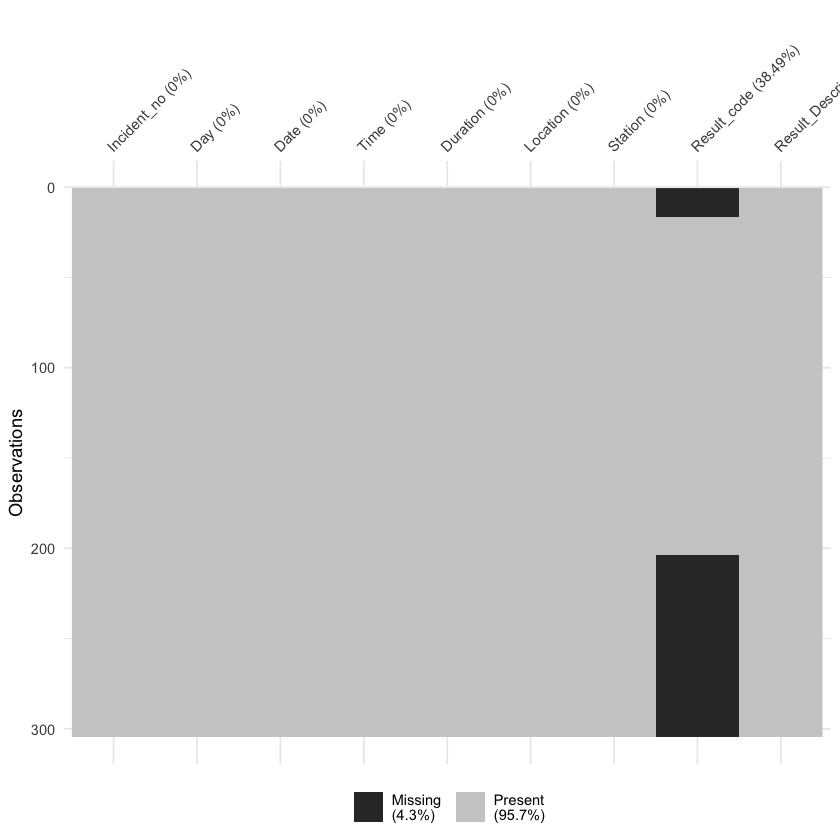

In [244]:
check_tibble <- the_tibble %>% vis_miss()
check_tibble

## Make empty string in Result Description to show NA insteas of an empty string

In [245]:
the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,NA
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,NA
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,NA
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,NA
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,NA
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,NA


## Automate the whole things
### the goal of this function is to have on function that will call any other related function which used to produce desired data

In [246]:
#this function returns a dataframe about the fire incidents called in a week( from Monday to Sunday)
#this function take region(characters) to indicate what region we want to get the data
#1 = North, 2 = Central, 3 = South
get_fire_incidents_data_in_a_week <- function(region) {
    the_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        the_tibble <- rbind(the_tibble, region_incident_data(region, i))
    }

    the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
    
    
    the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))


    the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)

    the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 

    the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
    
    return(the_tibble)
}

north_region_data <- get_fire_incidents_data_in_a_week("1")
north_region_data
central_region_data <- get_fire_incidents_data_in_a_week("2")
central_region_data
south_region_data <- get_fire_incidents_data_in_a_week("3")
south_region_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579643,Mon,2022-10-17,00:30:00,00:00:00,WESTGATE AUCKLAND,West Harbour,NA,NA
F3579644,Mon,2022-10-17,01:00:00,00:00:00,WARKWORTH AUCKLAND,Warkworth,NA,NA
F3579645,Mon,2022-10-17,01:30:00,00:00:00,ROYAL OAK AUCKLAND,Onehunga,NA,NA
F3579646,Mon,2022-10-17,01:30:00,00:00:00,WHANGAREI HEADS WHANGAREI DISTRICT,Whangarei Heads,NA,NA
F3579647,Mon,2022-10-17,01:30:00,00:00:00,PAKURANGA HEIGHTS AUCKLAND,Howick,NA,NA
F3579653,Mon,2022-10-17,03:00:00,00:00:00,TORBAY AUCKLAND,East Coast Bays,NA,NA
F3579660,Mon,2022-10-17,04:00:00,00:00:00,ROSEDALE AUCKLAND,Albany,NA,NA
F3579661,Mon,2022-10-17,04:30:00,00:00:00,AUCKLAND CENTRAL AUCKLAND,Parnell,NA,NA
F3579663,Mon,2022-10-17,05:30:00,00:00:00,STANMORE BAY AUCKLAND,Silverdale,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579641,Mon,2022-10-17,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579642,Mon,2022-10-17,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579650,Mon,2022-10-17,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,NA
F3579651,Mon,2022-10-17,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,NA
F3579670,Mon,2022-10-17,06:30:00,00:00:00,TRENTHAM UPPER HUTT CITY,Trentham,NA,NA
F3579679,Mon,2022-10-17,07:30:00,00:00:00,PETONE LOWER HUTT CITY,Seaview,NA,NA
F3579695,Mon,2022-10-17,08:00:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA
F3579707,Mon,2022-10-17,08:30:00,00:00:00,TWYFORD HASTINGS DISTRICT,Hastings,NA,NA
F3579710,Mon,2022-10-17,08:30:00,00:00:00,FERNHILL HASTINGS DISTRICT,Hastings,NA,NA


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3579640,Mon,2022-10-17,00:30:00,00:00:00,MOTUEKA TASMAN DISTRICT,Motueka,NA,NA
F3579652,Mon,2022-10-17,02:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Ilam,NA,NA
F3579655,Mon,2022-10-17,03:00:00,00:00:00,LINWOOD CHRISTCHURCH CITY,Christchurch City,NA,NA
F3579658,Mon,2022-10-17,03:30:00,00:00:00,WESTPORT BULLER DISTRICT,Westport,NA,NA
F3579665,Mon,2022-10-17,06:00:00,00:00:00,GORE GORE DISTRICT,Gore,NA,NA
F3579675,Mon,2022-10-17,06:30:00,00:00:00,OMARAMA WAITAKI DISTRICT,Omarama,NA,NA
F3579682,Mon,2022-10-17,07:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Ilam,NA,NA
F3579685,Mon,2022-10-17,07:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Spreydon,NA,NA
F3579686,Mon,2022-10-17,08:00:00,00:00:00,PICTON MARLBOROUGH DISTRICT,Picton,NA,NA


In [262]:
read_akl <- read.csv(file = 'auckland_df.csv')
read_akl

read_akl[["Date"]] <- as.Date(read_akl[["Date"]])
read_akl

akl_fire <- merge(x=north_region_data,y= read_akl, by= c("Date","Day"))
akl_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Auckland,Mon,2022-10-17,Morning showers,Fairly breezy Sou'West winds,11,18,26
Auckland,Tue,2022-10-18,Partly cloudy,Breezy to brisk Sou'West winds,12,17,29
Auckland,Wed,2022-10-19,"Windy, with showers",Breezy to brisk West to Sou'West winds,12,17,33
Auckland,Thu,2022-10-20,Partly cloudy,Fairly breezy South to Sou'West winds,10,18,23
Auckland,Fri,2022-10-21,Mainly sunny,Breezy South to Sou'West winds,10,17,19
Auckland,Sat,2022-10-22,Mostly sunny,Fairly breezy West to Sou'West winds,12,19,22
Auckland,Sun,2022-10-23,Partly cloudy,Fairly breezy West to Sou'West winds,13,19,22
Auckland,Mon,2022-10-24,Partly cloudy,Breezy West to Sou'West winds,13,19,19
Auckland,Tue,2022-10-25,Mostly cloudy,Fairly breezy Nor'West winds,14,20,22


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Auckland,Mon,2022-10-17,Morning showers,Fairly breezy Sou'West winds,11,18,26
Auckland,Tue,2022-10-18,Partly cloudy,Breezy to brisk Sou'West winds,12,17,29
Auckland,Wed,2022-10-19,"Windy, with showers",Breezy to brisk West to Sou'West winds,12,17,33
Auckland,Thu,2022-10-20,Partly cloudy,Fairly breezy South to Sou'West winds,10,18,23
Auckland,Fri,2022-10-21,Mainly sunny,Breezy South to Sou'West winds,10,17,19
Auckland,Sat,2022-10-22,Mostly sunny,Fairly breezy West to Sou'West winds,12,19,22
Auckland,Sun,2022-10-23,Partly cloudy,Fairly breezy West to Sou'West winds,13,19,22
Auckland,Mon,2022-10-24,Partly cloudy,Breezy West to Sou'West winds,13,19,19
Auckland,Tue,2022-10-25,Mostly cloudy,Fairly breezy Nor'West winds,14,20,22


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
2022-10-17,Mon,F3579661,04:30:00,00:00:00,AUCKLAND CENTRAL AUCKLAND,Parnell,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579668,06:00:00,00:00:00,MOUNT MAUNGANUI TAURANGA CITY,Mount Maunganui,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579671,06:30:00,00:00:00,POINT ENGLAND AUCKLAND,Mount Wellington,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579663,05:30:00,00:00:00,STANMORE BAY AUCKLAND,Silverdale,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579666,06:00:00,00:00:00,PUKEKOHE AUCKLAND,Pukekohe,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579680,07:30:00,00:00:00,HENDERSON AUCKLAND,Henderson,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579690,08:00:00,00:00:00,HELENSVILLE AUCKLAND,Helensville,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579696,08:00:00,00:00:00,PAPATOETOE AUCKLAND,Papatoetoe,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26
2022-10-17,Mon,F3579704,08:30:00,00:00:00,BETHLEHEM TAURANGA CITY,Tauranga,NA,NA,Auckland,Morning showers,Fairly breezy Sou'West winds,11,18,26


In [248]:
read_welly <- read.csv(file = 'wellington_df.csv')
read_welly

read_welly[["Date"]] <- as.Date(read_welly[["Date"]])
read_welly

welly_fire <- merge(x=central_region_data,y= read_welly, by= c("Date","Day"))
welly_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Wellington,Mon,2022-10-17,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
Wellington,Tue,2022-10-18,Morning showers,Fairly breezy Westerly winds,10,14,22
Wellington,Wed,2022-10-19,Mostly sunny,Breezy to brisk Nor'West winds,9,16,31
Wellington,Thu,2022-10-20,Windy and partly cloudy,Strong and blustery Southerly winds,8,11,48
Wellington,Fri,2022-10-21,Partly cloudy,Fairly breezy Southerly winds,10,13,25
Wellington,Sat,2022-10-22,Windy and partly cloudy,Brisk North to Nor'West winds,11,15,44
Wellington,Sun,2022-10-23,Windy and partly cloudy,Brisk Northerly winds,12,15,38
Wellington,Mon,2022-10-24,Windy and partly cloudy,Brisk North to Nor'West winds,12,16,44
Wellington,Tue,2022-10-25,"Windy, with showers",Breezy to brisk North to Nor'West winds,11,15,37


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Wellington,Mon,2022-10-17,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
Wellington,Tue,2022-10-18,Morning showers,Fairly breezy Westerly winds,10,14,22
Wellington,Wed,2022-10-19,Mostly sunny,Breezy to brisk Nor'West winds,9,16,31
Wellington,Thu,2022-10-20,Windy and partly cloudy,Strong and blustery Southerly winds,8,11,48
Wellington,Fri,2022-10-21,Partly cloudy,Fairly breezy Southerly winds,10,13,25
Wellington,Sat,2022-10-22,Windy and partly cloudy,Brisk North to Nor'West winds,11,15,44
Wellington,Sun,2022-10-23,Windy and partly cloudy,Brisk Northerly winds,12,15,38
Wellington,Mon,2022-10-24,Windy and partly cloudy,Brisk North to Nor'West winds,12,16,44
Wellington,Tue,2022-10-25,"Windy, with showers",Breezy to brisk North to Nor'West winds,11,15,37


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
2022-10-17,Mon,F3579641,00:30:00,00:00:00,NEW PLYMOUTH NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579642,00:30:00,00:00:00,WESTOWN NEW PLYMOUTH DISTRICT,New Plymouth,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579650,02:30:00,00:00:00,MANAKAU HOROWHENUA DISTRICT,Otaki,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579735,09:00:00,00:00:00,BERHAMPORE WELLINGTON CITY,Newtown,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579748,09:30:00,00:00:00,MARTINBOROUGH SOUTH WAIRARAPA DISTRICT,Martinborough,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579766,09:30:00,00:00:00,STRATFORD STRATFORD DISTRICT,Stratford,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579775,10:00:00,00:00:00,MOUNT VICTORIA WELLINGTON CITY,Wellington City,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579783,10:00:00,00:00:00,JOHNSONVILLE WELLINGTON CITY,Johnsonville,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30
2022-10-17,Mon,F3579651,02:30:00,00:00:00,ROSLYN PALMERSTON NORTH CITY,Milson,NA,NA,Wellington,Mainly sunny,Breezy to brisk Nor'West winds,9,16,30


In [250]:
read_chch <- read.csv(file = 'christchurch_df.csv')
read_chch

read_chch[["Date"]] <- as.Date(read_chch[["Date"]])
read_chch

chch_fire <- merge(x=south_region_data,y= read_chch, by= c("Date","Day"))
chch_fire

Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
Christchurch,Mon,2022-10-17,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
Christchurch,Tue,2022-10-18,Partly cloudy,Fairly breezy Nor'East winds,7,14,21
Christchurch,Wed,2022-10-19,Light rain developing in the afternoon,Fairly breezy Westerly winds,7,18,21
Christchurch,Thu,2022-10-20,Morning showers,Breezy to brisk South to Sou'West winds,5,11,32
Christchurch,Fri,2022-10-21,Mainly sunny,Fairly breezy Easterly winds,6,13,23
Christchurch,Sat,2022-10-22,Partly cloudy,Light Northerly winds,9,19,13
Christchurch,Sun,2022-10-23,Partly cloudy,Breezy North to Nor'East winds,10,19,16
Christchurch,Mon,2022-10-24,Partly cloudy,Breezy Nor'West winds,12,21,16
Christchurch,Tue,2022-10-25,Showers,Breezy North to Nor'East winds,10,17,17


Location,Day,Date,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<chr>,<chr>,<date>,<chr>,<chr>,<int>,<int>,<int>
Christchurch,Mon,2022-10-17,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
Christchurch,Tue,2022-10-18,Partly cloudy,Fairly breezy Nor'East winds,7,14,21
Christchurch,Wed,2022-10-19,Light rain developing in the afternoon,Fairly breezy Westerly winds,7,18,21
Christchurch,Thu,2022-10-20,Morning showers,Breezy to brisk South to Sou'West winds,5,11,32
Christchurch,Fri,2022-10-21,Mainly sunny,Fairly breezy Easterly winds,6,13,23
Christchurch,Sat,2022-10-22,Partly cloudy,Light Northerly winds,9,19,13
Christchurch,Sun,2022-10-23,Partly cloudy,Breezy North to Nor'East winds,10,19,16
Christchurch,Mon,2022-10-24,Partly cloudy,Breezy Nor'West winds,12,21,16
Christchurch,Tue,2022-10-25,Showers,Breezy North to Nor'East winds,10,17,17


Date,Day,Incident_no,Time,Duration,Location.x,Station,Result_code,Result_Description,Location.y,Weather_Pattern,Wind_Pattern,Night_Temp,Day_Temp,Wind
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
2022-10-17,Mon,F3579652,02:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Ilam,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579655,03:00:00,00:00:00,LINWOOD CHRISTCHURCH CITY,Christchurch City,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579658,03:30:00,00:00:00,WESTPORT BULLER DISTRICT,Westport,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579675,06:30:00,00:00:00,OMARAMA WAITAKI DISTRICT,Omarama,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579682,07:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Ilam,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579685,07:30:00,00:00:00,RICCARTON CHRISTCHURCH CITY,Spreydon,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579665,06:00:00,00:00:00,GORE GORE DISTRICT,Gore,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579702,08:30:00,00:00:00,OMARAMA WAITAKI DISTRICT,Omarama,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13
2022-10-17,Mon,F3579743,09:00:00,00:00:00,GERALDINE TIMARU DISTRICT,Geraldine,NA,NA,Christchurch,Light rain developing in the afternoon,Light South to Sou'West winds,5,16,13


In [251]:
library(visdat)

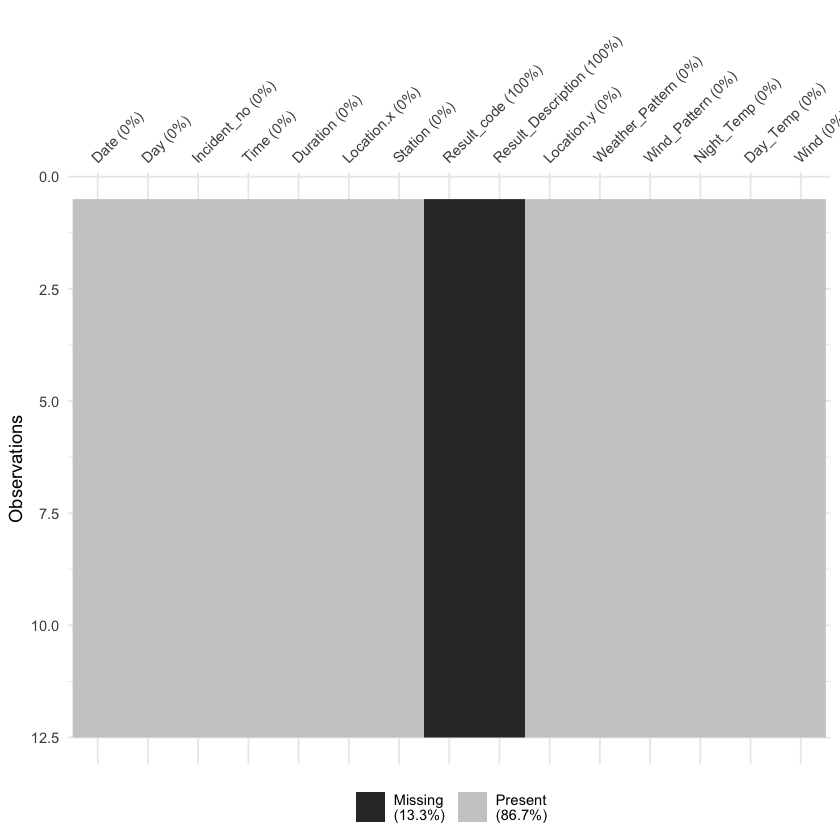

In [252]:
check <- chch_fire %>%vis_miss()
check

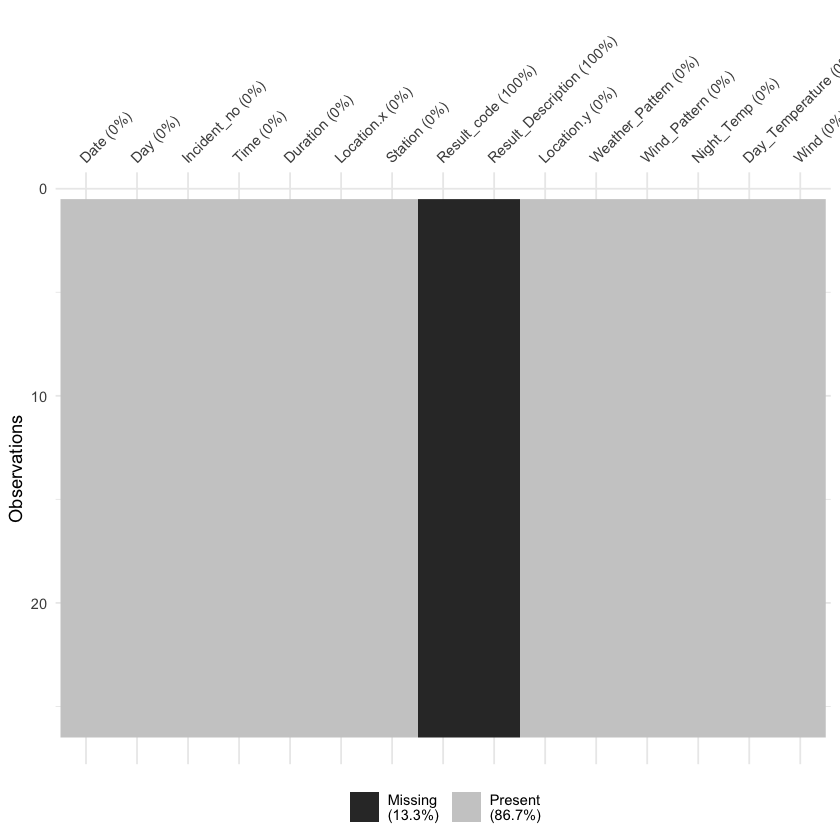

In [256]:
check <- akl_fire %>%vis_miss()
check

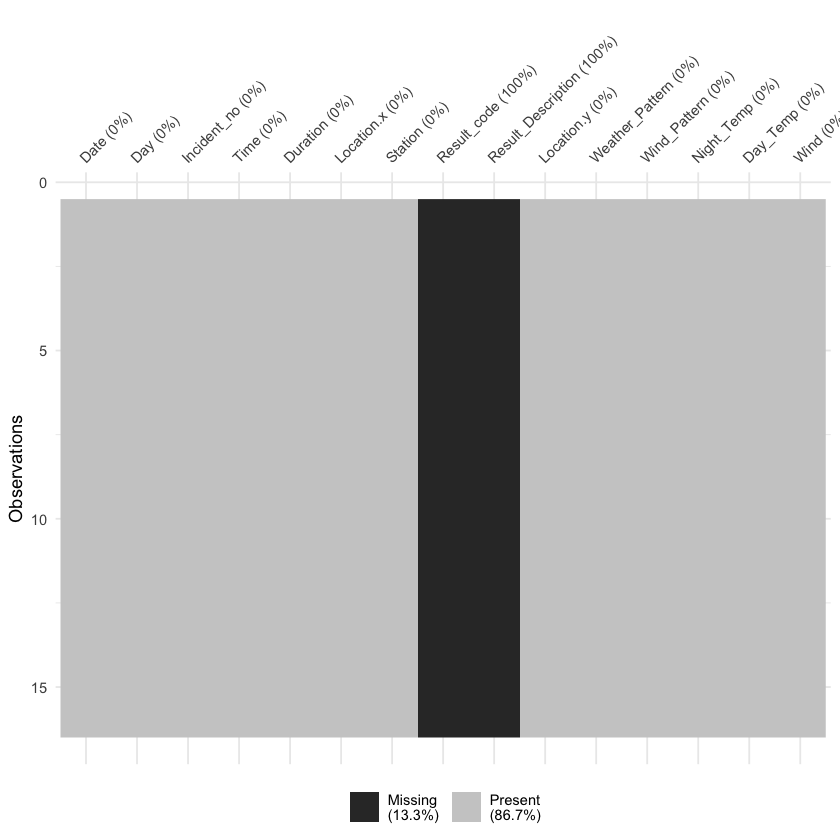

In [254]:
check <- welly_fire %>%vis_miss()
check